In [1]:
import warnings

import pandas as pd
import matplotlib.pyplot as plt

from surprise import *
from mlxtend.frequent_patterns import apriori, association_rules

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Online Retail.csv")

In [3]:
display(data.head(2))
display(data.tail(2))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [4]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data.dropna(inplace=True)

## France specific analysis

In [6]:
france_data = data[data['Country'] == 'France']

In [7]:
france_data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France


In [8]:
france_data.drop(labels=['InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'], 
                 axis=1, 
                 inplace=True)

In [9]:
france_data.head(2)

,InvoiceNo,StockCode,Description,Quantity
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24
27,536370,22727,ALARM CLOCK BAKELIKE RED,24


In [10]:
basket = france_data.pivot_table(index='InvoiceNo', 
                                 columns='Description', 
                                 values='Quantity', 
                                 aggfunc='sum').fillna(0)

In [11]:
display(basket.head(2))
display(basket.tail(2))

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
C580263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C581316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
basket = basket.applymap(lambda x: 1 if x > 0 else  0)

In [13]:
display(basket.head(2))
display(basket.tail(2))

Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Description,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
C580263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
frequent_itemsets = apriori(basket, 
                            min_support=0.07, 
                            use_colnames=True)

In [15]:
display(frequent_itemsets.head(2))
display(frequent_itemsets.tail(2))

,support,itemsets
0,0.082969,(ALARM CLOCK BAKELIKE GREEN)
1,0.087336,(ALARM CLOCK BAKELIKE PINK)


,support,itemsets
65,0.087336,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES, SET/6..."
66,0.085153,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE..."


In [16]:
rules = association_rules(frequent_itemsets, 
                          metric='lift', 
                          min_threshold=1)

In [17]:
display(frequent_itemsets.head(2))
display(frequent_itemsets.tail(2))

,support,itemsets
0,0.082969,(ALARM CLOCK BAKELIKE GREEN)
1,0.087336,(ALARM CLOCK BAKELIKE PINK)


,support,itemsets
65,0.087336,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES, SET/6..."
66,0.085153,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE..."


In [18]:
sorted_rules = rules.sort_values(by='lift', ascending=False)

In [19]:
display(sorted_rules.head(2))
display(sorted_rules.tail(2))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
94,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",0.109170,0.087336,0.085153,0.780,8.931,0.075618,4.148472,0.996858
91,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.087336,0.109170,0.085153,0.975,8.931,0.075618,35.633188,0.973009


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(POSTAGE),(LUNCH BAG SPACEBOY DESIGN ),0.655022,0.102620,0.078603,0.120000,1.169362,0.011384,1.019750,0.419831
11,(LUNCH BAG SPACEBOY DESIGN ),(POSTAGE),0.102620,0.655022,0.078603,0.765957,1.169362,0.011384,1.473998,0.161395


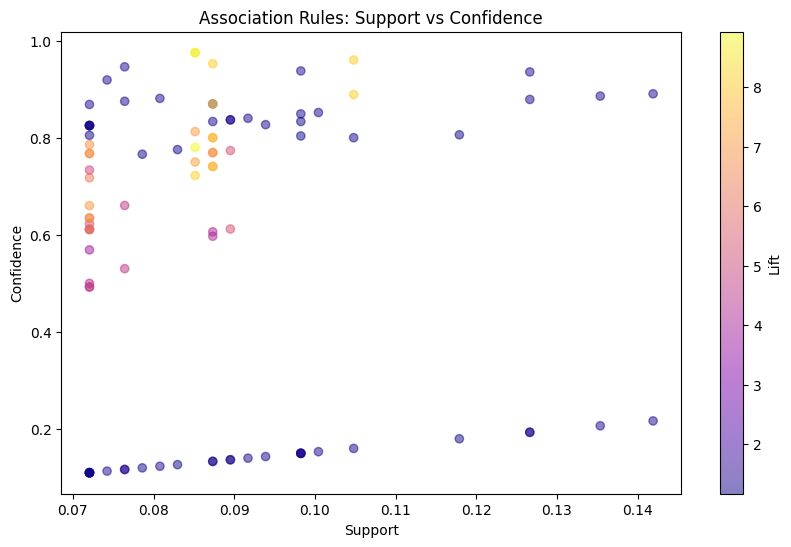

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(x=rules['support'], 
            y=rules['confidence'], 
            alpha=0.5, 
            c=rules['lift'], 
            cmap='plasma')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence')
plt.colorbar(label='Lift')
plt.show()

In [21]:
print("Filtering the rules to focus on high-confidence and highly supportive rules.")
interesting_rules = rules[(rules['lift'] > 1.5) & (rules['confidence'] > 0.8)].reset_index()

Filtering the rules to focus on high-confidence and highly supportive rules.


In [22]:
interesting_rules

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,58,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.109170,0.117904,0.104803,0.960000,8.142222,0.091932,22.052402,0.984681
1,59,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.117904,0.109170,0.104803,0.888889,8.142222,0.091932,8.017467,0.994431
2,84,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES)",(SET/6 RED SPOTTY PAPER CUPS),0.091703,0.117904,0.087336,0.952381,8.077601,0.076524,18.524017,0.964663
3,85,"(POSTAGE, SET/6 RED SPOTTY PAPER CUPS)",(SET/6 RED SPOTTY PAPER PLATES),0.100437,0.109170,0.087336,0.869565,7.965217,0.076372,6.829694,0.972087
4,90,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER CUPS),0.087336,0.117904,0.085153,0.975000,8.269444,0.074856,35.283843,0.963195
5,91,"(SET/20 RED RETROSPOT PAPER NAPKINS , SET/6 RE...",(SET/6 RED SPOTTY PAPER PLATES),0.087336,0.109170,0.085153,0.975000,8.931000,0.075618,35.633188,0.973009
6,92,"(SET/6 RED SPOTTY PAPER PLATES, SET/6 RED SPOT...",(SET/20 RED RETROSPOT PAPER NAPKINS ),0.104803,0.113537,0.085153,0.812500,7.156250,0.073254,4.727802,0.960976
